<a href="https://colab.research.google.com/github/sunyeul/ToyProjectLab/blob/feature%2Fvector-database/vector_database/Vector_Database_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ベクトルデータベースハンズオンチュートリアル

## 事前準備

### Dataset

Food-11データセットのevaluationデータから10枚ずつ

https://www.kaggle.com/datasets/trolukovich/food11-image-dataset

In [ ]:
# gdownがエラーの場合はローカルからアップロードしてください
!gdown 1LQlARH2BoAXhBL7Uf1uNpAU9DaBCn0FM
!unzip -q Food-11.zip

Downloading...
From: https://drive.google.com/uc?id=1LQlARH2BoAXhBL7Uf1uNpAU9DaBCn0FM
To: /content/Food-11.zip
100% 7.10M/7.10M [00:00<00:00, 41.8MB/s]


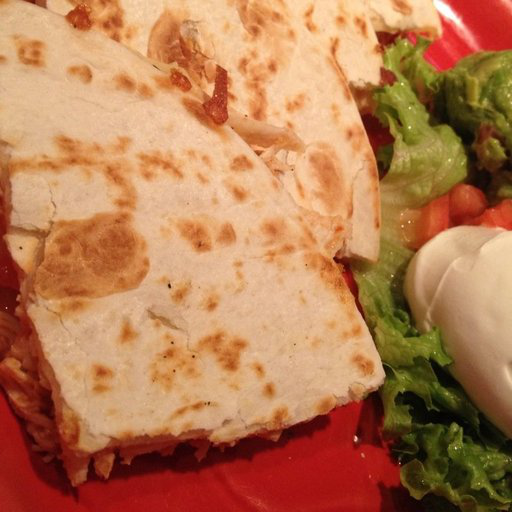

In [ ]:
from PIL import Image

img = Image.open("test/Bread/0.jpg")

img

### Image Vectorizerモデルをロード

https://huggingface.co/facebook/dino-vits16

In [ ]:
!pip install --upgrade transformers -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 84.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.2 MB/s eta 0:00:00


In [ ]:
from transformers import ViTFeatureExtractor, ViTModel

feature_extractor = ViTFeatureExtractor.from_pretrained('facebook/dino-vits16')
model = ViTModel.from_pretrained('facebook/dino-vits16').to("cuda")

print("Models loaded!")

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTModel were not initialized from the model checkpoint at facebook/dino-vits16 and are newly initialized: ['pooler.dense.weight', 'pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Models loaded!


### 画像のベクトル化

In [ ]:
# 特徴量抽出
img_tensor = feature_extractor(images=img, return_tensors="pt").to("cuda")

# モデルによる変換
outputs = model(**img_tensor)

# 最後のEmbeddingレイヤーだけを取り出す
embedding = outputs.pooler_output.detach().cpu().numpy().squeeze()

embedding

array([-0.62587035,  0.8062272 , -0.02511366, -0.69065905,  0.58217555,
       -0.30217505, -0.0699519 ,  0.9995915 ,  0.128682  ,  0.62139684,
       -0.8925637 , -0.7316078 , -0.8176653 , -0.9998889 ,  0.9894617 ,
       -0.9383466 , -0.9898466 ,  0.74692506,  0.01776336,  0.75313133,
       -0.93540573,  0.8800734 , -0.9980591 ,  0.82197964,  0.37727204,
        0.6964211 , -0.9223446 , -0.7209238 ,  0.92285085, -0.39483976,
       -0.2180646 ,  0.58919835, -0.9821259 ,  0.7114275 ,  0.66961133,
       -0.19107597,  0.11355789, -0.87995636, -0.99987584,  0.96659356,
        0.95135844,  0.8242273 ,  0.10124388,  0.9821039 ,  0.79969305,
        0.8793623 , -0.966646  , -0.29545155,  0.6074356 ,  0.9651989 ,
       -0.8963839 ,  0.83080965,  0.98906153, -0.07535552,  0.9907589 ,
        0.95753837, -0.9926035 ,  0.975033  ,  0.9092431 ,  0.9164338 ,
        0.69790334, -0.92253965,  0.6345738 ,  0.9738852 , -0.27929592,
       -0.393405  ,  0.9693968 , -0.07008571,  0.99776596, -0.19

In [ ]:
# 次元の確認
embedding.shape

(384,)

## Chroma DB

https://www.trychroma.com

In [ ]:
!pip install --upgrade chromadb -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 8.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.6/922.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 89.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [ ]:
import chromadb

client = chromadb.Client()

collection = client.create_collection("foods")

### 全画像のベクトル化

In [ ]:
from glob import glob

img_list = sorted(glob("test/*/*.jpg"))

len(img_list)

110

In [ ]:
from tqdm import tqdm

embeddings = []
metadatas = []
ids = []

for i, img_path in enumerate(tqdm(img_list)):
    img = Image.open(img_path)
    cls = img_path.split("/")[1]

    img_tensor = feature_extractor(images=img, return_tensors="pt").to("cuda")
    outputs = model(**img_tensor)

    embedding = outputs.pooler_output.detach().cpu().numpy().squeeze().tolist()

    embeddings.append(embedding)

    metadatas.append({
        "uri": img_path,
        "name": cls
    })

    ids.append(str(i))

print("Done!")

100%|██████████| 110/110 [00:02<00:00, 41.57it/s]

Done!


### データベース構築

In [ ]:
collection.add(
    embeddings=embeddings,
    metadatas=metadatas,
    ids=ids,
)

### 検索Test

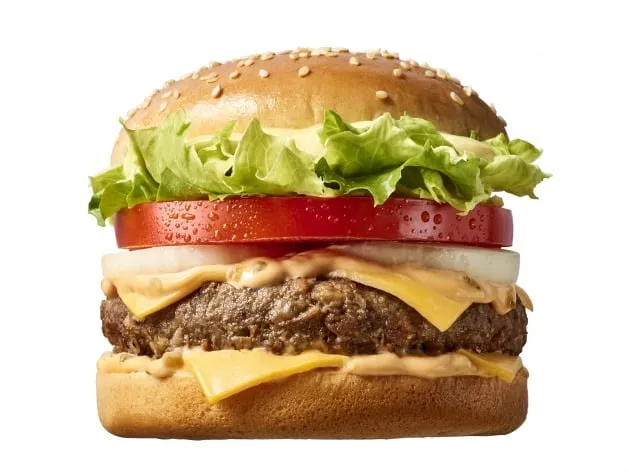

In [ ]:
import requests

test_img = Image.open(requests.get("https://i.imgur.com/yNp6qTS.png", stream=True).raw).convert("RGB")

test_img

In [ ]:
test_img_tensor = feature_extractor(images=test_img, return_tensors="pt").to("cuda")
test_outputs = model(**test_img_tensor)

test_embedding = test_outputs.pooler_output.detach().cpu().numpy().squeeze().tolist()

len(test_embedding)

384

In [ ]:
query_result = collection.query(
    query_embeddings=[test_embedding],
    n_results=3,
)

query_result

{'ids': [['8', '2', '20']],
 'embeddings': None,
 'documents': [[None, None, None]],
 'metadatas': [[{'uri': 'test/Bread/8.jpg', 'name': 'Bread'},
   {'uri': 'test/Bread/2.jpg', 'name': 'Bread'},
   {'uri': 'test/Dessert/0.jpg', 'name': 'Dessert'}]],
 'distances': [[164.78582763671875, 212.7489776611328, 301.5579528808594]]}

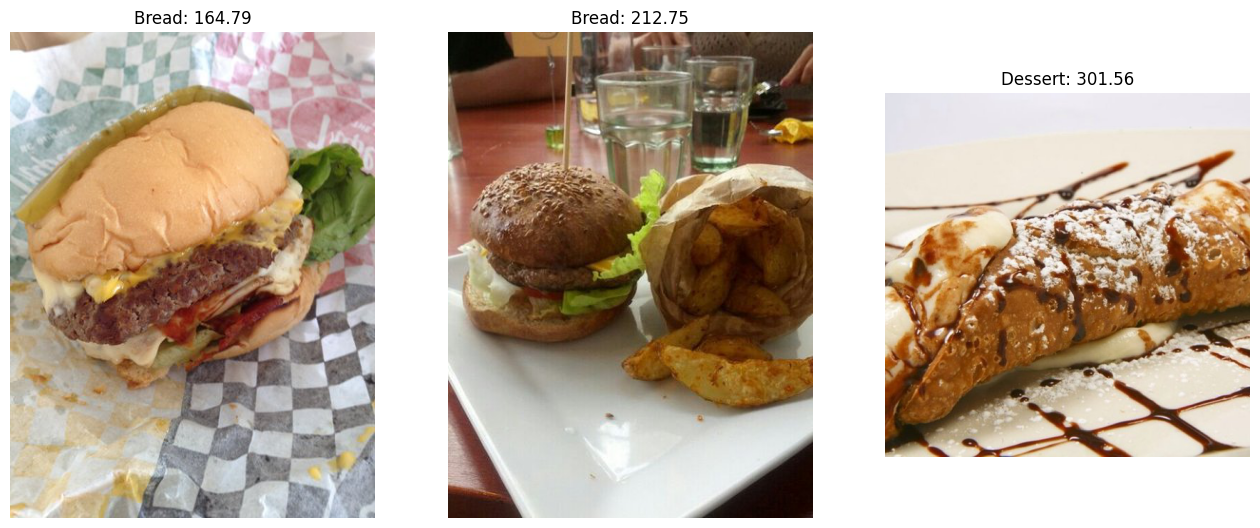

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(16, 10))

for i, metadata in enumerate(query_result["metadatas"][0]):
    distance = query_result["distances"][0][i]
    uri = metadata["uri"]
    name = metadata['name']

    axes[i].imshow(Image.open(uri))
    axes[i].set_title(f"{name}: {distance:.2f}")
    axes[i].axis("off")

#### 関数化

In [ ]:
def query(img_url, n_results=3):
    test_img = Image.open(requests.get(img_url, stream=True).raw).convert("RGB")

    test_img_tensor = feature_extractor(images=test_img, return_tensors="pt").to("cuda")
    test_outputs = model(**test_img_tensor)

    test_embedding = test_outputs.pooler_output.detach().cpu().numpy().squeeze().tolist()

    query_result = collection.query(
        query_embeddings=[test_embedding],
        n_results=n_results,
    )

    fig, axes = plt.subplots(1, 4, figsize=(16, 10))

    axes[0].imshow(test_img)
    axes[0].set_title("Query")
    axes[0].axis("off")

    for i, metadata in enumerate(query_result["metadatas"][0]):
        distance = query_result["distances"][0][i]

        axes[i+1].imshow(Image.open(metadata["uri"]))
        axes[i+1].set_title(f"{metadata['name']}: {distance:.2f}")
        axes[i+1].axis("off")

    return query_result

{'ids': [['47', '54', '50']],
 'embeddings': None,
 'documents': [[None, None, None]],
 'metadatas': [[{'uri': 'test/Fried food/7.jpg', 'name': 'Fried food'},
   {'uri': 'test/Meat/4.jpg', 'name': 'Meat'},
   {'uri': 'test/Meat/0.jpg', 'name': 'Meat'}]],
 'distances': [[279.7848815917969, 294.95550537109375, 306.2466735839844]]}

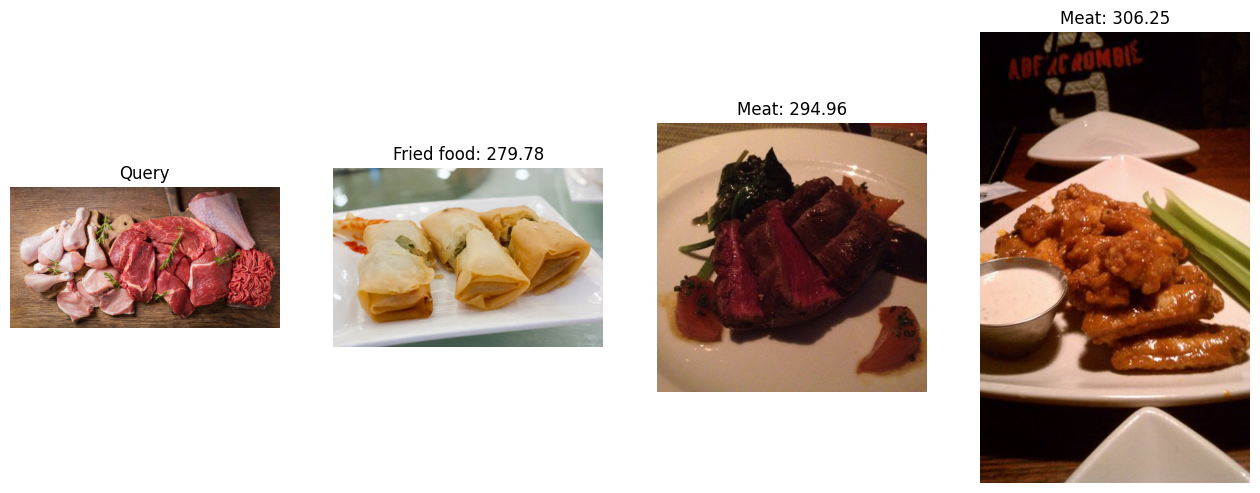

In [ ]:
query("https://i.imgur.com/QCado9g.jpg")

{'ids': [['13', '50', '36']],
 'embeddings': None,
 'documents': [[None, None, None]],
 'metadatas': [[{'uri': 'test/Dairy product/3.jpg', 'name': 'Dairy product'},
   {'uri': 'test/Meat/0.jpg', 'name': 'Meat'},
   {'uri': 'test/Egg/6.jpg', 'name': 'Egg'}]],
 'distances': [[209.1685791015625, 239.22373962402344, 240.568359375]]}

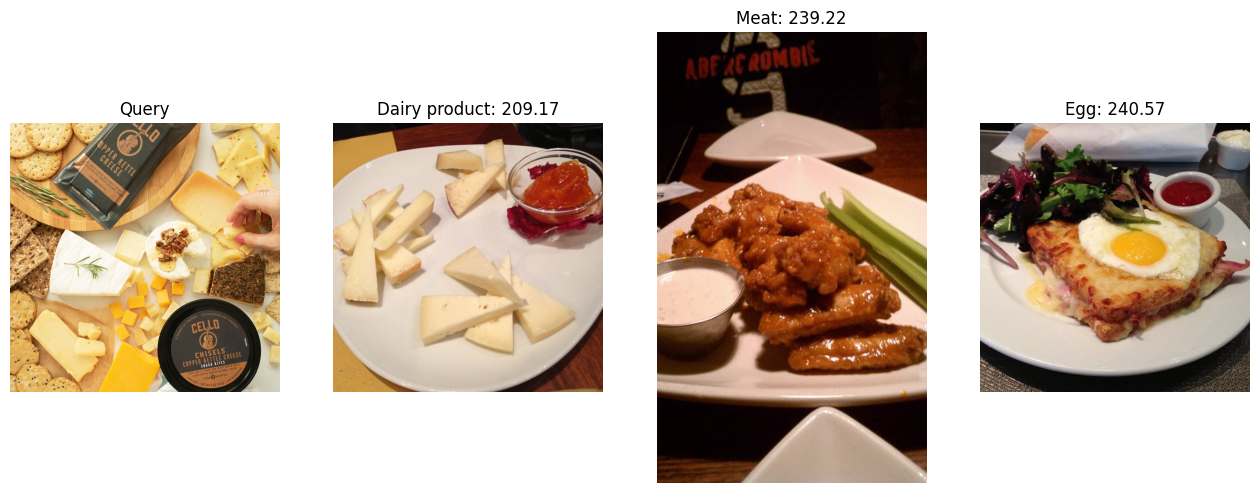

In [ ]:
query("https://i.imgur.com/lf5C0LI.png")

{'ids': [['73', '72', '77']],
 'embeddings': None,
 'documents': [[None, None, None]],
 'metadatas': [[{'uri': 'test/Rice/3.jpg', 'name': 'Rice'},
   {'uri': 'test/Rice/2.jpg', 'name': 'Rice'},
   {'uri': 'test/Rice/7.jpg', 'name': 'Rice'}]],
 'distances': [[235.09759521484375, 254.33364868164062, 254.9343719482422]]}

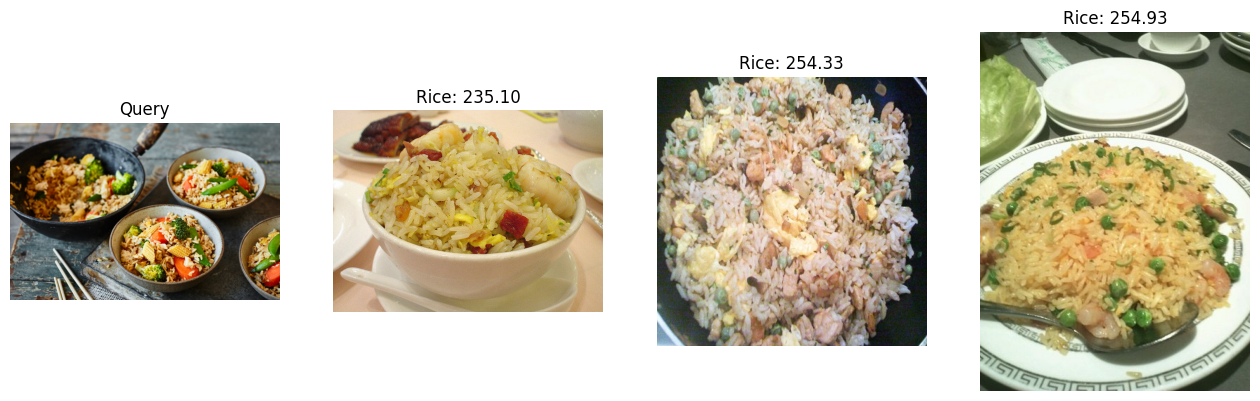

In [ ]:
query("https://i.imgur.com/WlLv0i9.png")

## Qdrant

In [ ]:
!pip install --upgrade qdrant-client -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.8/127.8 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 110.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.9/70.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 8.8 MB/s eta 0:00:00


### データベース構築

In [ ]:
from qdrant_client import QdrantClient


client = QdrantClient(path="path/to/db")  # Persists changes to disk, fast prototyping

In [ ]:
from qdrant_client.models import Distance, VectorParams

client.recreate_collection(
    collection_name="my_collection",
    vectors_config=VectorParams(
        size=384,  # ハードコーディング
        distance=Distance.EUCLID   # Distance.COSINE
        ),
)

True

In [ ]:
from qdrant_client.models import PointStruct

points: list = []

for i, img_path in enumerate(tqdm(img_list)):
    img = Image.open(img_path)
    cls = img_path.split("/")[1]

    img_tensor = feature_extractor(images=img, return_tensors="pt").to("cuda")
    outputs = model(**img_tensor)

    embedding = outputs.pooler_output.detach().cpu().numpy().squeeze()

    points.append(
        PointStruct(
            id=i,
            vector=embedding.tolist(),
            payload={"uri": img_path, "name": cls}  # metadata
        )
    )

client.upsert(
    collection_name="my_collection",
    points=points
)

print("Done!")

100%|██████████| 110/110 [00:11<00:00,  9.66it/s]


Done!


### 検索Test

In [ ]:
test_img_tensor = feature_extractor(images=test_img, return_tensors="pt").to("cuda")
test_outputs = model(**test_img_tensor)

test_embedding = test_outputs.pooler_output.detach().cpu().numpy().squeeze()

test_embedding.shape

(384,)

In [ ]:
hits = client.search(
    collection_name="my_collection",
    query_vector=test_embedding,
    limit=3  # Return 3 closest points
)

hits

[ScoredPoint(id=8, version=0, score=12.836893081665039, payload={'uri': 'test/Bread/8.jpg', 'name': 'Bread'}, vector=None),
 ScoredPoint(id=2, version=0, score=14.585916519165039, payload={'uri': 'test/Bread/2.jpg', 'name': 'Bread'}, vector=None),
 ScoredPoint(id=20, version=0, score=17.36542510986328, payload={'uri': 'test/Dessert/0.jpg', 'name': 'Dessert'}, vector=None)]

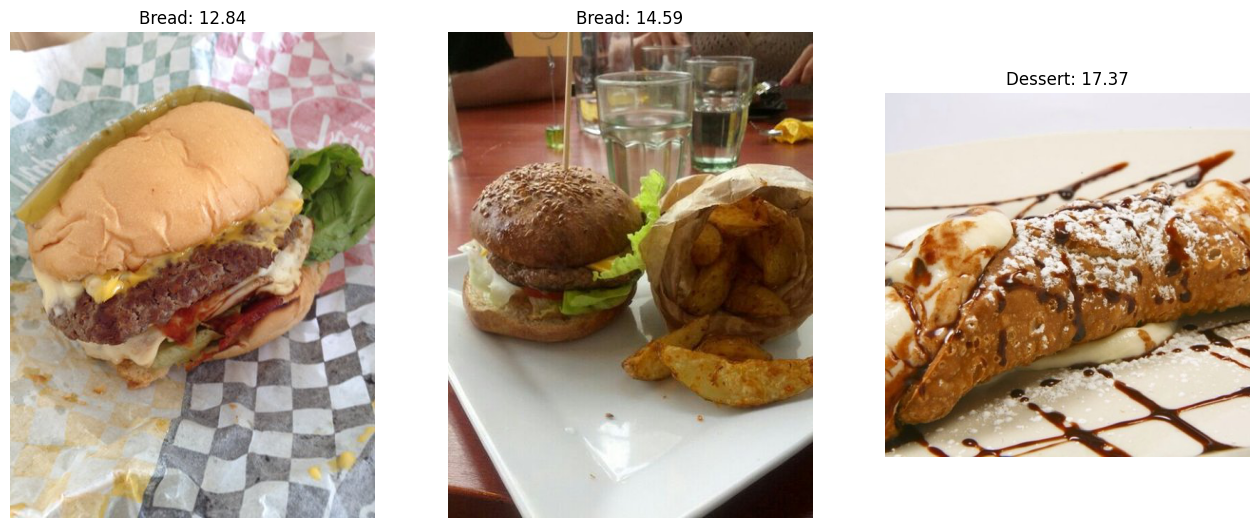

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(16, 10))

for i, hit in enumerate(hits):
    distance = hit.score
    uri = hit.payload['uri']
    name = hit.payload['name']

    axes[i].imshow(Image.open(uri))
    axes[i].set_title(f"{name}: {distance:.2f}")
    axes[i].axis("off")

### 条件付き検索テスト

In [ ]:
from qdrant_client.models import Filter, FieldCondition, Range, MatchValue

filtered_hits = client.search(
    collection_name="my_collection",
    query_vector=test_embedding,
    query_filter=Filter(
        must=[  # These conditions are required for search results
            FieldCondition(
                key='name',  # Condition based on values of `name` field.
                # range=Range(gte=3),  # Select only those results where `name` >= 3
                match=MatchValue(value='Bread')
            )
        ]
    ),
    limit=3  # Return 3 closest points
)

filtered_hits

[ScoredPoint(id=8, version=0, score=12.836893081665039, payload={'uri': 'test/Bread/8.jpg', 'name': 'Bread'}, vector=None),
 ScoredPoint(id=2, version=0, score=14.585916519165039, payload={'uri': 'test/Bread/2.jpg', 'name': 'Bread'}, vector=None),
 ScoredPoint(id=1, version=0, score=17.493370056152344, payload={'uri': 'test/Bread/1.jpg', 'name': 'Bread'}, vector=None)]

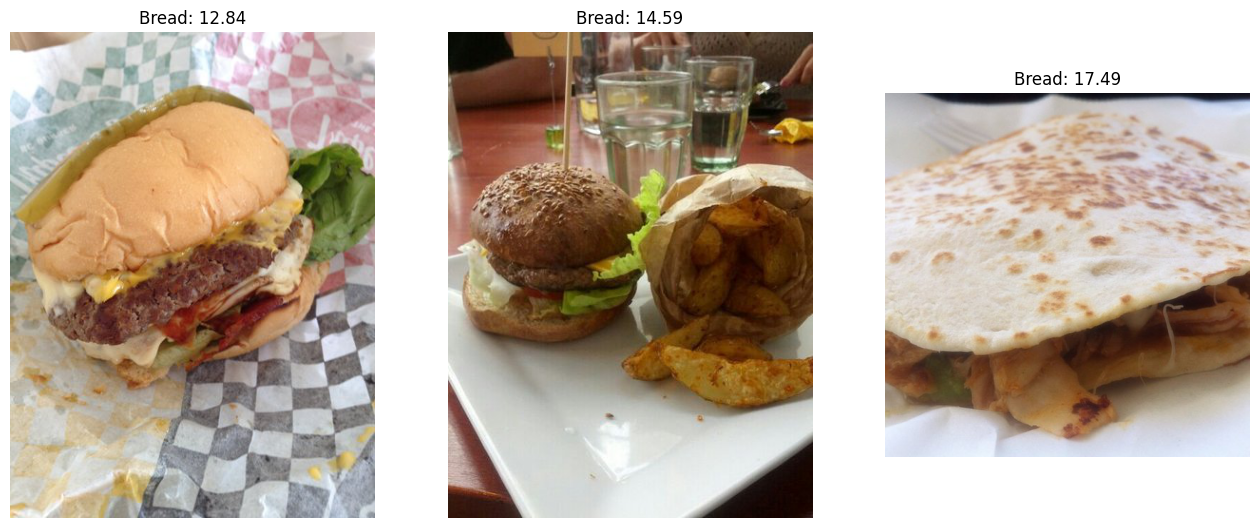

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(16, 10))

for i, hit in enumerate(filtered_hits):
    distance = hit.score
    uri = hit.payload['uri']
    name = hit.payload['name']

    axes[i].imshow(Image.open(uri))
    axes[i].set_title(f"{name}: {distance:.2f}")
    axes[i].axis("off")